In [ ]:
# Climate Action Data Analysis
# Objectives 
# 1. Load and preprocess the dataset
# 2. Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to find patterns and relationships
# 4. Visualize the data to understand trends and distributions
# 5. Evaluate the model performance using appropriate metrics
# 6. Identify patterns and correlations to examine the relationships between soil and environmental variables
# 7. Save the cleaned and processed data for future use

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#load data set and perform initial inspection
df = pd.read_csv('climate_action_data.csv')

#more initial inspections
df.head()
df.info()

#statistical inspections
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [3]:
#Handling bad data:
#empty values
#check for null values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [7]:
#Handling missing values
#create an array to store our data
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col],errors='coerce')# convert to numeric ,coerce errors to NaN
        #fill NaN values with mean of column
        df[col]= df[col].fillna(df[col].median())

#categorical columns, we fill missing values with mode
categorical_cols = ['Crop_Type'] 
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
print('Check again for missing values')
print(df.isnull().sum())

Check again for missing values
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [6]:
#data in wrong format
#convert date column to datetime format
df['Date']= pd.to_datetime(df['Date'], errors= 'coerce')

In [8]:
#wrong data type
price_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in price_cols:
    if col in df.columns:
        #Remove extreme outliers (beyond 3 std)
        mean = df[col].mean()
        std= df[col].std()    
        
        df[col]= np.where((df[col] < mean - 3* std) | (df[col]> mean + 3*std), np.nan , df[col])
        df[col]= df[col].fillna(df[col]. median())

In [9]:
#ceck duplicate
print('Number of duplicate rows:',df.duplicated().sum())


Number of duplicate rows: 111


In [10]:
#remove duplicate
df = df.drop_duplicates()
print('Number of rows after removing duplicates:',df.shape[0])
#check for duplicate date
print('Number of duplicate dates:',df['Date'].duplicated().sum())
#remove duplicate dates
df= df.drop_duplicates(subset=['Date'], keep='first')

#shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [11]:
#final clean dataset
df.info()
#check for empty values after all cleaning
print('Missing values after all cleaning:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

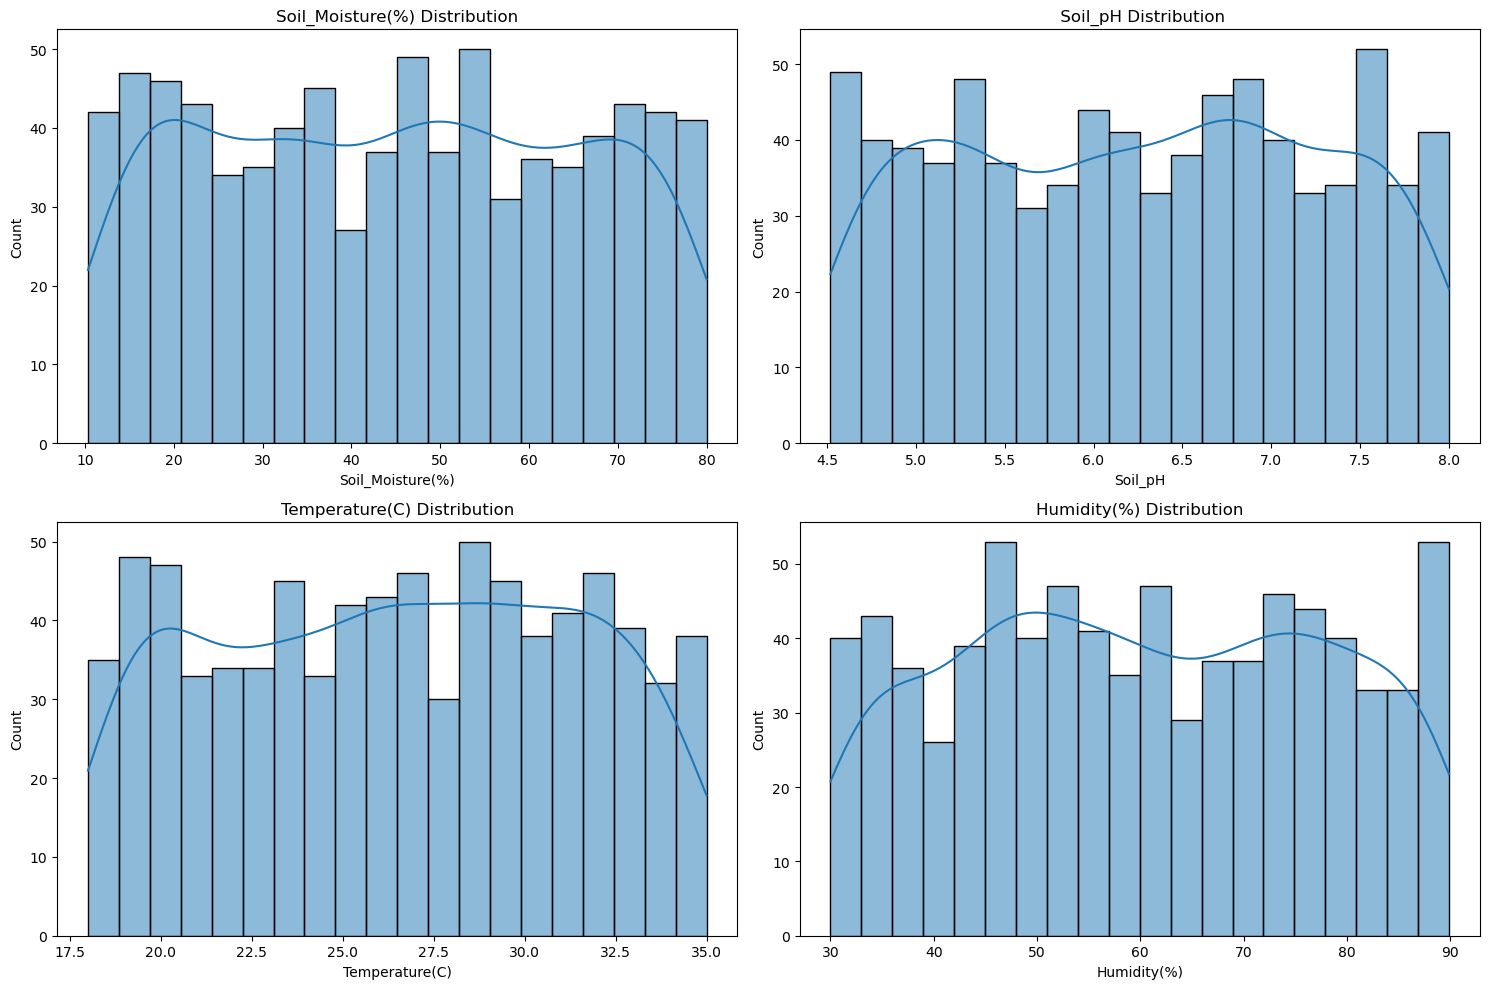

In [14]:
#Visualizing the distribution of numeric variables using histograms
# Set up the figure
plt.figure(figsize=(15, 10))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=20, kde=True)
plt.title('Soil_Moisture(%) Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins=20, kde=True)
plt.title(' Soil_pH Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Temperature(C)'], bins=20, kde=True)
plt.title('Temperature(C) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Humidity(%)'], bins=20, kde=True)
plt.title('Humidity(%) Distribution')

plt.tight_layout()
plt.show()

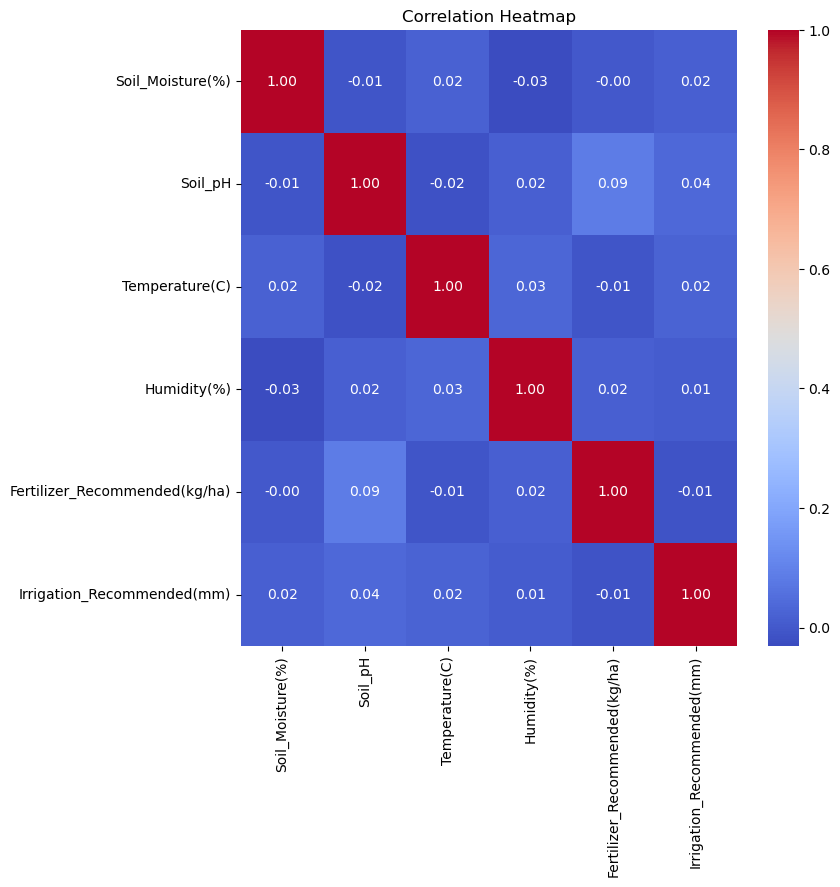

In [17]:
#Analysis
#Correlation Analysis
#calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()
 
 #plot correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Variables that most influence fertilizer recommendations:
     #Soil_pH has the stonest influence on fertilizer recommendations with a correlation of 0.09

#Crop type with the highest average soil moisture:
     #

#The appropriate irrigation adjustments for crops experiencing average temperatures above 30°C:

# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between the numeric columns, particularly between 'Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)
# 3. The cleaned and processed data is ready for further analysis or modeling.
# 4. Saved the cleaned and processed data for future use


In [19]:
# Export the cleaned dataset to CSV
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
